<a href="https://colab.research.google.com/github/WardahAsad/SignEase/blob/main/Polynomial_Linear_Regression_Predicting_Ice_Cream_Sales_from_Temperature.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Assignment 3: Predicting Ice Cream Sales from Temperature**

#### **Problem Statement**
The relationship between temperature and ice cream sales is often nonlinear, with sales typically increasing as the temperature rises, but at a diminishing rate. This model will use polynomial regression to predict ice cream sales based on temperature, capturing the nonlinear relationship between these variables.

#### **How the Model Will Help**
This model can help businesses or marketing teams in the ice cream industry plan their inventory and sales strategies based on weather forecasts, optimizing stock levels and maximizing sales during hot days.

#### **Data Description**
The dataset contains two columns:
- **temperature**: The temperature in degrees (e.g., Celsius or Fahrenheit).
- **ice_cream_sales**: The number of ice cream units sold at that particular temperature.

#### **Instructions**
1. **Load and Explore**: Load the dataset and plot `temperature` against `ice_cream_sales` to observe any nonlinear relationship.
2. **Feature Transformation**: Transform the `temperature` feature to polynomial terms (e.g., degree 2 or 3) to capture nonlinear trends.
3. **Model Training**: Split the data into training (80%) and testing (20%) sets, and train a polynomial regression model to predict `ice_cream_sales`.
4. **Visualization**: Plot the polynomial regression curve against the actual data points for visualization.



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score

# Step 1: Load the dataset
df = pd.read_csv('/content/Ice_cream selling data.csv')

print("Dataset Head:")
print(df.head())
print("\nDataset Description:")
print(df.describe())

Dataset Head:
   Temperature (°C)  Ice Cream Sales (units)
0         -4.662263                41.842986
1         -4.316559                34.661120
2         -4.213985                39.383001
3         -3.949661                37.539845
4         -3.578554                32.284531

Dataset Description:
       Temperature (°C)  Ice Cream Sales (units)
count         49.000000                49.000000
mean           0.271755                15.905308
std            2.697672                12.264682
min           -4.662263                 0.328626
25%           -2.111870                 4.857988
50%            0.688781                12.615181
75%            2.784836                25.142082
max            4.899032                41.842986


In [4]:
print(df.columns.tolist())

['Temperature (°C)', 'Ice Cream Sales (units)']


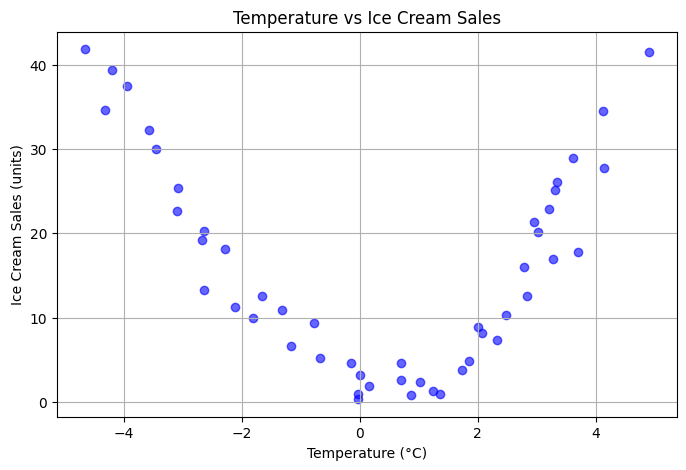

In [6]:
# Step 2: Explore the relationship with a scatter plot
plt.figure(figsize=(8, 5))
plt.scatter(df['Temperature (°C)'], df['Ice Cream Sales (units)'], color='blue', alpha=0.6)
plt.title('Temperature vs Ice Cream Sales')
plt.xlabel('Temperature (°C)')
plt.ylabel('Ice Cream Sales (units)')
plt.grid(True)
plt.show()

In [7]:
# Step 3: Feature transformation - create polynomial features
# Trying both degree 2 and degree 3 to see which fits better
degrees = [2, 3]
models = []
results = []

**Using for loop...first for degree 2 and then for degree 3**

In [14]:
for degree in degrees:
    # Create polynomial features
    poly = PolynomialFeatures(degree=degree)
    X_poly = poly.fit_transform(df[['Temperature (°C)']])

    # Split the data into training and testing sets (80% train, 20% test)
    X_train, X_test, y_train, y_test = train_test_split(
        X_poly, df['Ice Cream Sales (units)'], test_size=0.2, random_state=42
    )

    # Train the polynomial regression model
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Calculate model performance metrics
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Store results
    models.append(model)
    results.append({
        'degree': degree,
        'model': model,
        'mse': mse,
        'r2': r2,
        'poly': poly
    })
    print(f"\nDegree {degree} Polynomial Regression Results:")
    print(f"Coefficients: {model.coef_}")
    print(f"Intercept: {model.intercept_}")
    print(f"Mean Squared Error: {mse:.2f}")
    print(f"R-squared Score: {r2:.2f}")

# Step 4: Determine the best degree based on R-squared
best_model = max(results, key=lambda x: x['r2'])
print(f"\n--> Best model is degree {best_model['degree']} with R-squared {best_model['r2']:.2f}")


Degree 2 Polynomial Regression Results:
Coefficients: [ 0.         -0.70641926  1.87145125]
Intercept: 2.7683058295738583
Mean Squared Error: 14.88
R-squared Score: 0.84

Degree 3 Polynomial Regression Results:
Coefficients: [ 0.         -1.39956426  1.87501919  0.05451597]
Intercept: 2.8405309852828076
Mean Squared Error: 15.12
R-squared Score: 0.84

--> Best model is degree 2 with R-squared 0.84


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


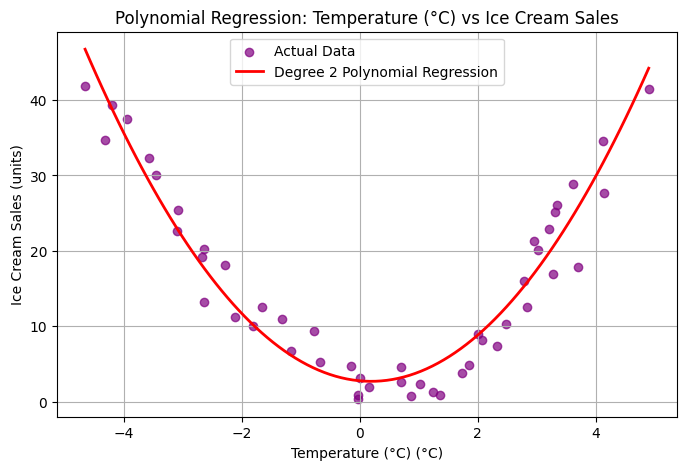

In [18]:
# Step 5: Visualize the polynomial regression curve
plt.figure(figsize=(8, 5))

# Create a range of temperatures for smooth curve plotting
temp_range = np.linspace(df['Temperature (°C)'].min(), df['Temperature (°C)'].max(), 100).reshape(-1, 1)
temp_range_poly = best_model['poly'].transform(temp_range)
sales_pred = best_model['model'].predict(temp_range_poly)

# Plot original data
plt.scatter(df['Temperature (°C)'], df['Ice Cream Sales (units)'], color='purple', alpha=0.7, label='Actual Data')

# Plot regression curve
plt.plot(temp_range, sales_pred, color='red', linewidth=2,
         label=f'Degree {best_model["degree"]} Polynomial Regression')

plt.title('Polynomial Regression: Temperature (°C) vs Ice Cream Sales')
plt.xlabel('Temperature (°C) (°C)')
plt.ylabel('Ice Cream Sales (units)')
plt.legend()
plt.grid(True)
plt.show()

In [22]:
# Step 6: Now Making a sample prediction
sample_temp = -1.5
sample_temp_poly = best_model['poly'].transform([[sample_temp]])
predicted_sales = best_model['model'].predict(sample_temp_poly)

print(f"\nPredicted ice cream sales at {sample_temp}°: {predicted_sales[0]:.2f} units\n")


Predicted ice cream sales at -1.5°: 8.04 units



/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
